In [ ]:
#libraries required
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist




In [ ]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



In [ ]:
# Function to limit the number of images used
def limit_images(x_data, num_images):
    if num_images > len(x_data):
        print(f"Number of images requested ({num_images}) exceeds the available images ({len(x_data)}). Using all available images.")
        return x_data
    return x_data[:num_images]

# number of images
num_train_images = 5000
num_test_images = 1000



In [ ]:
# Limit the number of images used
x_train = limit_images(x_train, num_train_images)
x_test = limit_images(x_test, num_test_images)

# Flatten the 28x28 images into vectors of size 784 (28*28)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [ ]:
# Defined the size of the encoded representation
encoding_dim = 64

# Defined the input layer
input_img = Input(shape=(784,))

# Defined the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Defined the reconstruction of the input from the encoded representation
decoded = Dense(784, activation='sigmoid')(encoded)

# Defined the autoencoder model that maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


In [ ]:
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=50,
                          shuffle=True,
                          validation_data=(x_test, x_test))



Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1646 - val_loss: 0.1530
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1446 - val_loss: 0.1384
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1310 - val_loss: 0.1277
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1217 - val_loss: 0.1198
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1124 - val_loss: 0.1134
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1077 - val_loss: 0.1084
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1031 - val_loss: 0.1042
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0991 - val_loss: 0.1005
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0957 - val_loss: 0.0977
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0932 - val_loss: 0.0952
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0907 - val_loss: 0.0932
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

In [ ]:
# Evaluated the trained model on the test data
loss = autoencoder.evaluate(x_test, x_test, verbose=0)
print('Test loss:', loss)

Test loss: 0.08254100382328033


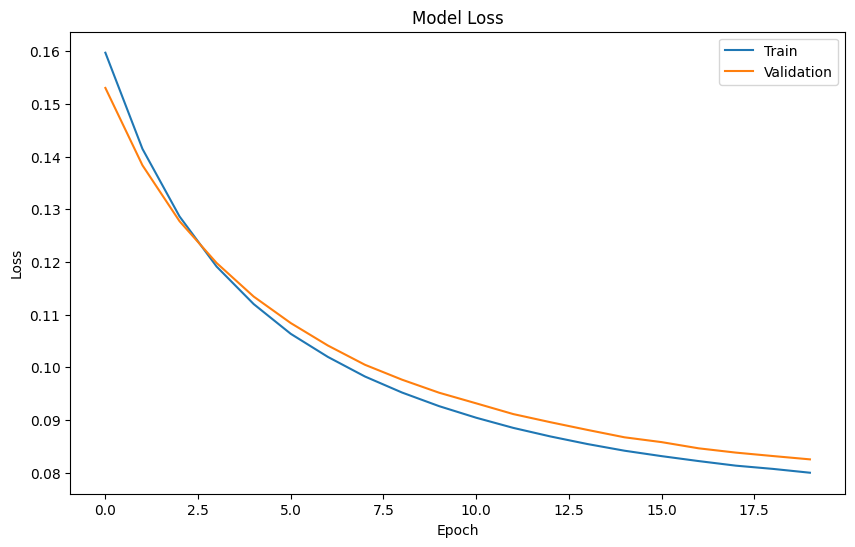

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Generate reconstructed images
reconstructed_images = autoencoder.predict(x_test)
# Reshape the images to original shape
reconstructed_images = reconstructed_images.reshape((len(reconstructed_images), 28, 28))
x_test_original = x_test.reshape((len(x_test), 28, 28))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


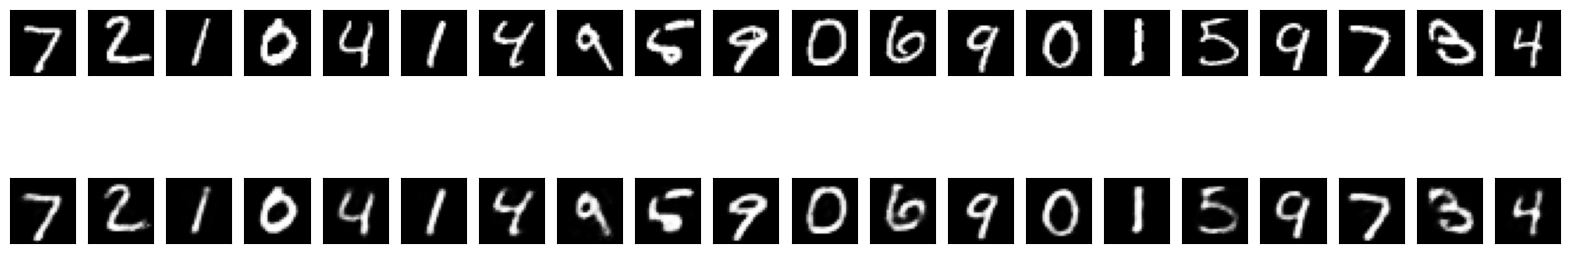

In [ ]:
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_original[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()